### Problem: 
1. Repeat your experiment with MOM on a single-humped dataset but with MLE instead!

2. Repeat your experiment with MOM on a single-humped dataset but with Bayesian simulation using PyMC3 instead!

3. Which method is more correct, and which was the most fun?

>**dataset:** https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-ntl&identifier=422

#### Part 1: MLE with a single humped dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the monthly_precip.txt file...

In [2]:
precip = pd.read_table("monthly_precip.txt", index_col=0, na_values='NA', delim_whitespace=True) 
precip.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,,,,,,,,,,,,
1912,0.72,0.84,1.05,0.79,4.21,1.46,6.54,3.51,4.00,1.76,0.70,2.00
1913,0.97,0.42,2.87,1.41,7.40,4.15,9.55,1.99,3.82,3.23,2.05,0.22
1914,0.87,0.47,1.39,2.75,6.41,3.27,2.93,3.44,4.19,2.81,0.71,0.94
1915,1.45,2.05,0.45,0.25,4.05,1.43,3.83,3.80,6.05,0.86,2.65,0.21
1916,2.45,0.45,1.54,1.99,3.39,4.82,0.02,3.76,7.64,3.64,1.12,0.82


Drawing histogram for each month...



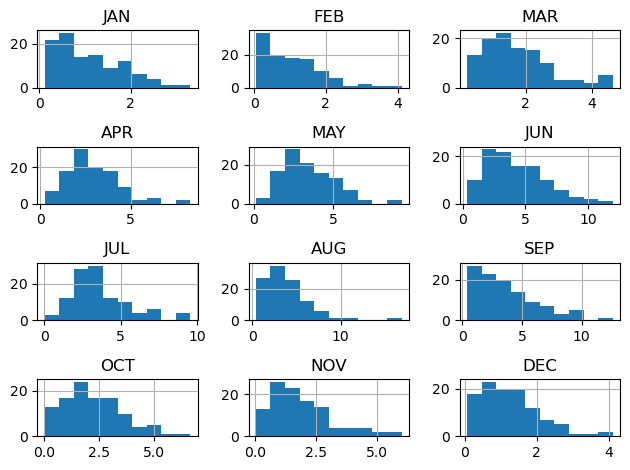

In [3]:
precip.hist(grid = True)
plt.tight_layout()

Using `precip.describe()` to generate descriptive statistics of a dataset or a pandas dataframe:

In [4]:
precip.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1.072294,1.038349,1.744679,2.896422,3.464495,4.215046,3.647431,3.744037,3.691835,2.268991,1.892569,1.271835
std,0.691470,0.781886,1.024987,1.446926,1.708982,2.343284,1.907703,2.422342,2.533615,1.349876,1.257030,0.817423
min,0.120000,0.050000,0.230000,0.250000,0.130000,0.360000,0.020000,0.420000,0.400000,0.040000,0.050000,0.070000
25%,0.530000,0.430000,1.010000,2.000000,2.280000,2.280000,2.400000,2.120000,1.630000,1.290000,1.030000,0.710000
50%,0.870000,0.880000,1.540000,2.640000,3.160000,3.790000,3.260000,3.370000,3.070000,2.090000,1.600000,1.200000
75%,1.590000,1.430000,2.330000,3.660000,4.310000,5.670000,4.460000,4.620000,5.020000,3.120000,2.470000,1.690000
max,3.300000,4.110000,4.620000,8.310000,9.330000,11.970000,9.550000,16.910000,12.590000,6.670000,5.980000,4.110000


In [5]:
from scipy.optimize import newton

[scipy.special.polygamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.polygamma.html) = $\frac{\partial^2 log(\Gamma(\alpha))}{\partial\alpha^2}$

$$\frac{\partial^2 log(l)(\alpha,\beta)}{\partial \alpha^2} = \frac{1}{\alpha} - \frac{\partial^2 log(\Gamma(\alpha))}{\partial\alpha^2}$$

First and second derivatives of the equation above, spelled out in python, are:

In [6]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

where `log_mean` and `mean_log` are $\log{\bar{x}}$ and $\overline{\log(x)}$, respectively.

In [7]:
# Calculate statistics
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

Now we use our `newton` function to find the value of $\alpha$ for which $$\frac{\partial log(l)(\alpha,\beta)}{\partial \alpha} = 0$$

In [8]:
# Alpha MLE
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

2.1911076661111073

And now plug this back into the solution for beta:

<div style="font-size: 120%;">  
$$ \beta  = \frac{\alpha}{\bar{X}} $$
</div>

In [9]:
# Beta MLE
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

1.7227925817363536

Calculating alpha_mom and beta_mom:

In [10]:
precip_mean = precip.mean()
print(precip_mean, "\n")

precip_var = precip.var()
print(precip_var)

alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean
alpha_mom, beta_mom

JAN    1.072294
FEB    1.038349
MAR    1.744679
APR    2.896422
MAY    3.464495
JUN    4.215046
JUL    3.647431
AUG    3.744037
SEP    3.691835
OCT    2.268991
NOV    1.892569
DEC    1.271835
dtype: float64 

JAN    0.478131
FEB    0.611345
MAR    1.050599
APR    2.093595
MAY    2.920619
JUN    5.490979
JUL    3.639332
AUG    5.867743
SEP    6.419204
OCT    1.822167
NOV    1.580125
DEC    0.668180
dtype: float64


(JAN    2.404810
 FEB    1.763599
 MAR    2.897303
 APR    4.007107
 MAY    4.109652
 JUN    3.235600
 JUL    3.655548
 AUG    2.388961
 SEP    2.123261
 OCT    2.825384
 NOV    2.266794
 DEC    2.420851
 dtype: float64,
 JAN    0.445895
 FEB    0.588767
 MAR    0.602173
 APR    0.722821
 MAY    0.843014
 JUN    1.302709
 JUL    0.997780
 AUG    1.567224
 SEP    1.738757
 OCT    0.803074
 NOV    0.834910
 DEC    0.525367
 dtype: float64)

Then comparing the fit between MOM and MLE for the month of July:

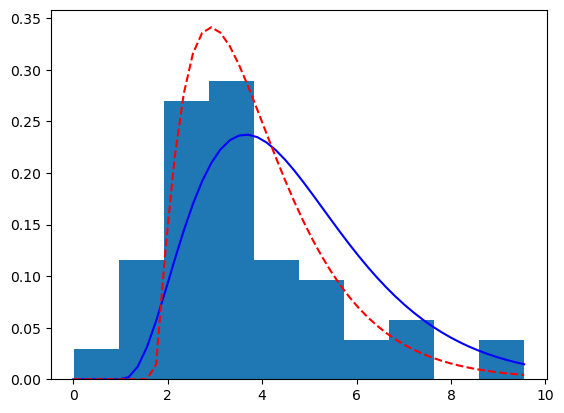

In [30]:
from scipy.stats.distributions import gamma

jul = precip.JUL
jul.hist(density=True, bins=10, grid=False)
x = np.linspace(0, jul.max())
plt.plot(x, gamma.pdf(x, alpha_mom[6], beta_mom[6]), 'b-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

It can be concluded that MLE fits the single humped dataset better than MOM!

#### Part 2: Bayesian Simulation 

Modeling using a Normal Distribution:

In [35]:
from pymc3 import Model, Uniform , Normal , StudentT

with Model() as rain_model:
    μ_0 = Normal('μ_0', 3.5, sd=1.25)
    μ_1 = Normal('μ_1', 3.5, sd=1.25)

Modeling using a Uniform Distribution:

In [36]:
with rain_model:
    σ_0 = Uniform('σ_0', lower=0, upper=2.5)
    σ_1 = Uniform('σ_1', lower=0, upper=2.5)

exponential distribution to model:

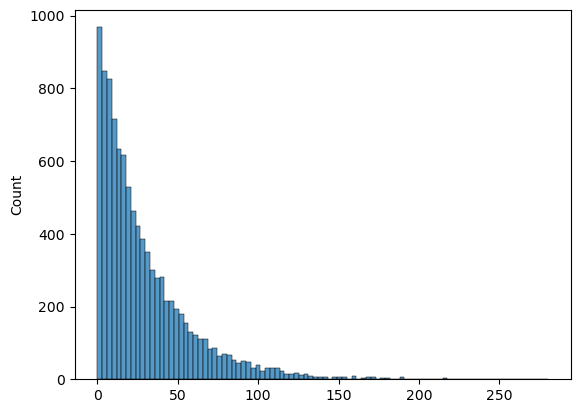

In [22]:
from pymc3 import Exponential
import seaborn as sns

sns.histplot(Exponential.dist(1/29).random(size=10000), kde=False);

In [37]:
with rain_model:
    ν = Exponential('ν_minus_log', 1/29.) + 1

In [24]:
with rain_model:
    rain_like = StudentT('rain_likes', nu=ν, mu=μ_1, lam=σ_1**2, observed=precip.JUL)

In [25]:
from pymc3 import Deterministic

with rain_model:
    diff_of_means = Deterministic('difference_of_means', μ_1 - μ_0)
    effect_size = Deterministic('effect_size', diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))

In [32]:
from pymc3 import fit
RANDOM_SEED = 20090425

with rain_model: 
    rain_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 228.5


Plotting all posterior distributions, throwing away the first 100 samples:

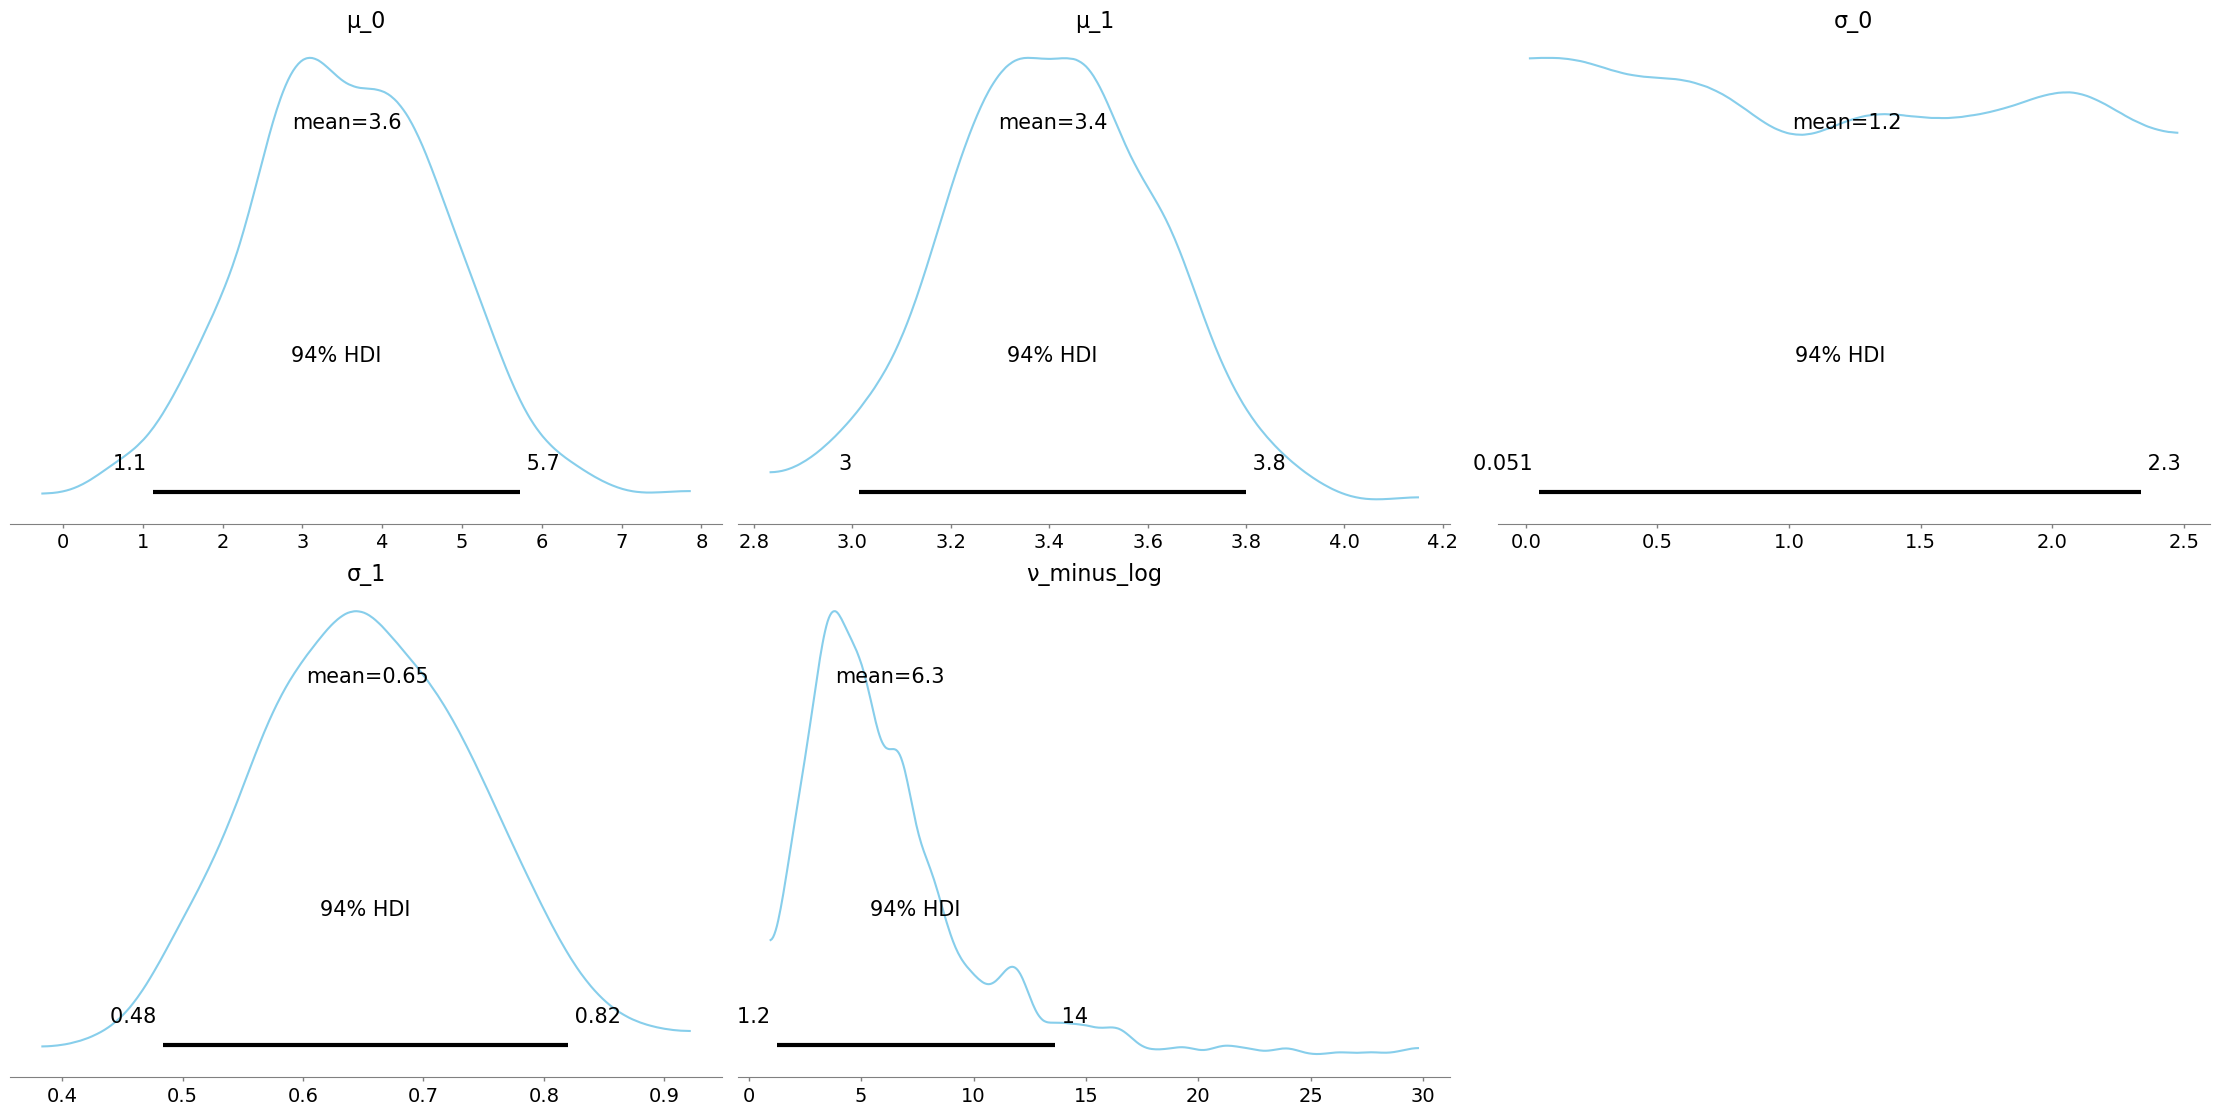

In [33]:
from pymc3 import plot_posterior

plot_posterior(rain_trace[100:], 
                var_names=['μ_0', 'μ_1', 'σ_0', 'σ_1', 'ν_minus_log'],
                color='#87ceeb');

#### Part 3: Which was better?

During the implementation of Maximum Likelihood Estimation (MLE), we discovered that the estimated values for the parameters - namely the mean and standard deviation - were significantly better than the values obtained through the Method of Moments approach, and were also closer to the actual values. 

On the other hand, when using Bayesian Simulation, we obtained fixed exact values for the means and standard deviations of the parameters, which were found to be even closer to the observed mean and standard deviation of the dataset when compared to MLE.

Overall, it was an enjoyable experience implementing both of these statistical approaches, and we were able to observe the strengths and weaknesses of each method in practice. 

While MLE is useful when prior knowledge about the parameters is limited and unbiased estimates are desired, Bayesian Simulation can be advantageous when incorporating prior knowledge or accounting for uncertainty about the parameters. Ultimately, the choice between these methods depends on the specific problem at hand and the assumptions that can be made.
